In [266]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import plotting as pl
import gus_utils as gu

In [267]:
data = Table.read("/data/aamw3/cannon/tc-cse-regularized-apogee-catalog.fits")

In [268]:
data.colnames

['APOGEE_ID',
 'TEFF',
 'LOGG',
 'AL_H',
 'CA_H',
 'C_H',
 'FE_H',
 'K_H',
 'MG_H',
 'MN_H',
 'NA_H',
 'NI_H',
 'N_H',
 'O_H',
 'SI_H',
 'S_H',
 'TI_H',
 'V_H',
 'E_TEFF',
 'E_LOGG',
 'E_AL_H',
 'E_CA_H',
 'E_C_H',
 'E_FE_H',
 'E_K_H',
 'E_MG_H',
 'E_MN_H',
 'E_NA_H',
 'E_NI_H',
 'E_N_H',
 'E_O_H',
 'E_SI_H',
 'E_S_H',
 'E_TI_H',
 'E_V_H',
 'R_CHI_SQ',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA',
 'DEC',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'TARGFLAGS',
 'NVISITS',
 'COMMISS',
 'SNR',
 'STARFLAG',
 'STARFLAGS',
 'ANDFLAG',
 'ANDFLAGS',
 'VHELIO_AVG',
 'VSCATTER',
 'VERR',
 'VERR_MED',
 'SYNTHVHELIO_AVG',
 'SYNTHVSCATTER',
 'SYNTHVERR',
 'SYNTHVERR_MED',
 'RV_TEFF',
 'RV_LOGG',
 'RV_FEH',
 'RV_CCFWHM',
 'RV_AUTOFWHM',
 'SYNTHSCATTER',
 'STABLERV_CHI2',
 'STABLERV_RCHI2',
 'CHI2_THRESHOLD',
 'STABLERV_CHI2_PROB',
 'APSTAR_VERSION',
 'ASPCAP_VERSION',
 'RESULTS_VERSION'

In [273]:
data=data[data['OK']==True] #get rid of things that aren't measured properly
pal5 = data[data['FIELD']=='M5PAL5'] #the field specifically targeted at pal5 and M5

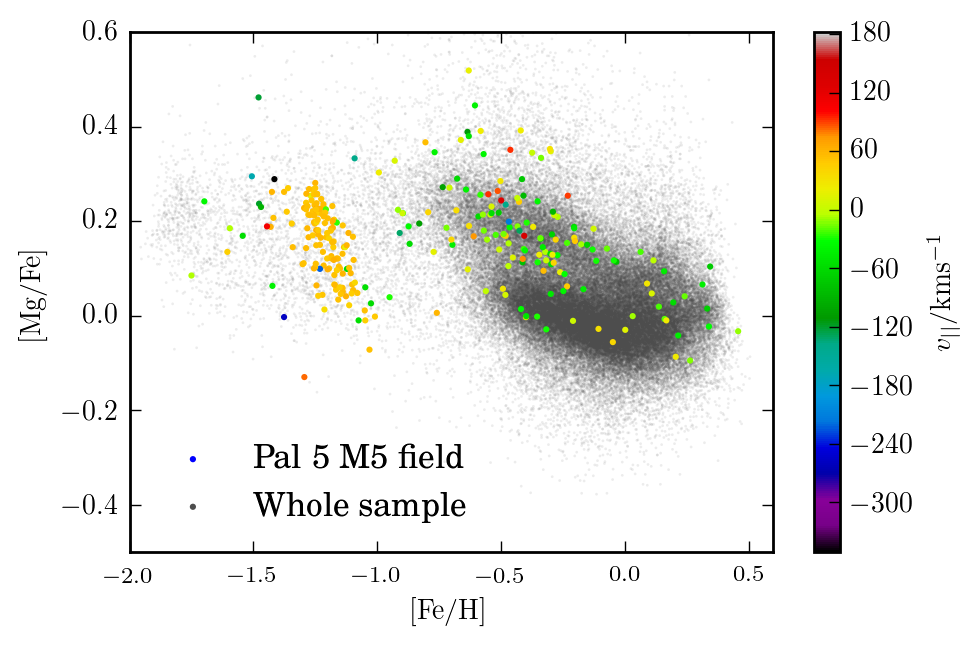

In [320]:
#make some plots of the data
plt.scatter(data['FE_H'],data['MG_H']-data['FE_H'],c='0.3',alpha=0.1,s=1,edgecolors='none')
plt.scatter(pal5['FE_H'],pal5['MG_H']-pal5['FE_H'],c=pal5['VHELIO_AVG'],cmap="spectral",
            s=5,edgecolors='none',label="Pal 5 M5 field")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.scatter(1.,-1.,c='0.3',edgecolors='none',s=5,label="Whole sample")
plt.legend(loc='lower left',frameon=False,scatterpoints=1)
plt.xlim((-2.,0.6))
plt.ylim((-0.5,0.6))
plt.xlabel("$\\mathrm{[Fe/H]}$")
plt.ylabel("$\\mathrm{[Mg/Fe]}$")
plotstr="/home/aamw3/Dropbox/PhD_dd/pal5/plots/"
plt.savefig(plotstr+"cannon_alphafe_feh.pdf")


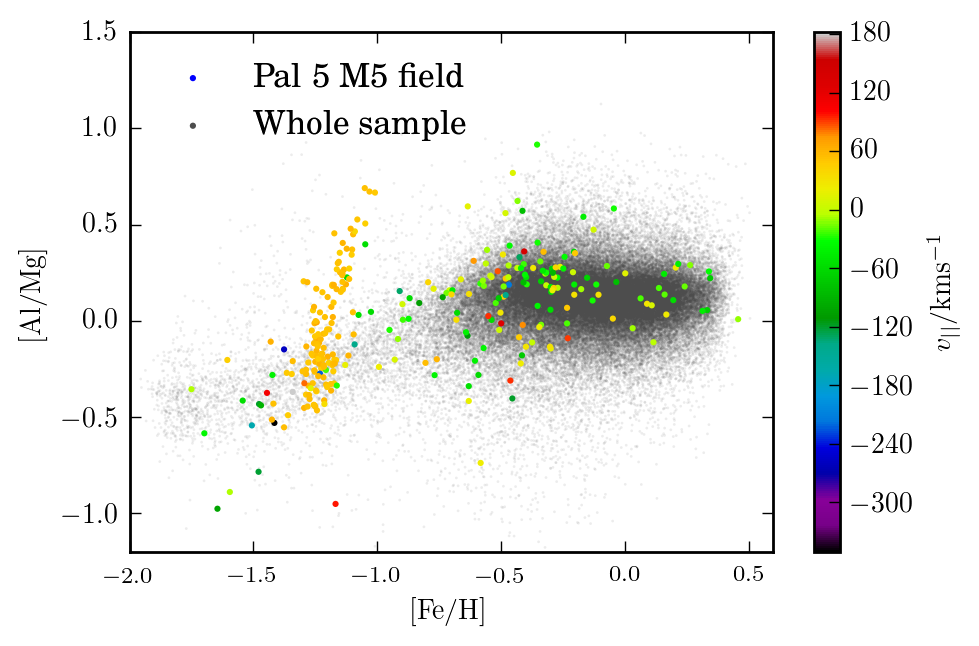

In [321]:
plt.scatter(data['FE_H'],data['AL_H']-data['MG_H'],c='0.3',alpha=0.1,s=1,edgecolors='none')
plt.scatter(pal5['FE_H'],pal5['AL_H']-pal5['MG_H'],c=pal5['VHELIO_AVG'],cmap="spectral",
            s=5,edgecolors='none',label="Pal 5 M5 field")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.scatter(1.,-1.,c='0.3',edgecolors='none',s=5,label="Whole sample")
plt.legend(loc='upper left',frameon=False,scatterpoints=1)
plt.xlim((-2.,0.6))
plt.ylim((-1.2,1.5))
plt.xlabel("$\\mathrm{[Fe/H]}$")
plt.ylabel("$\\mathrm{[Al/Mg]}$")
plt.savefig(plotstr+"cannon_almg_feh.pdf")

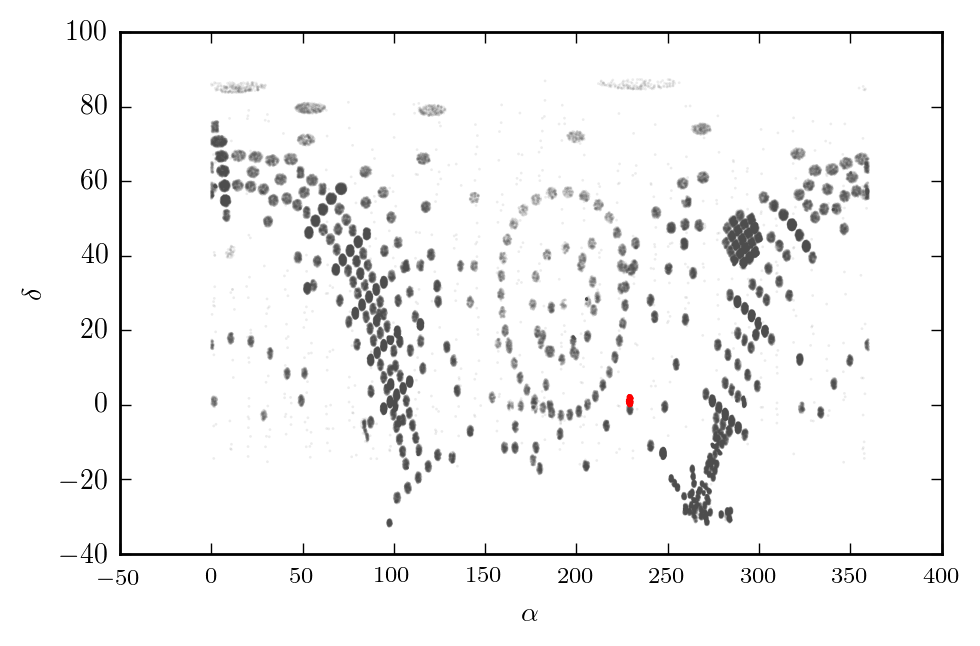

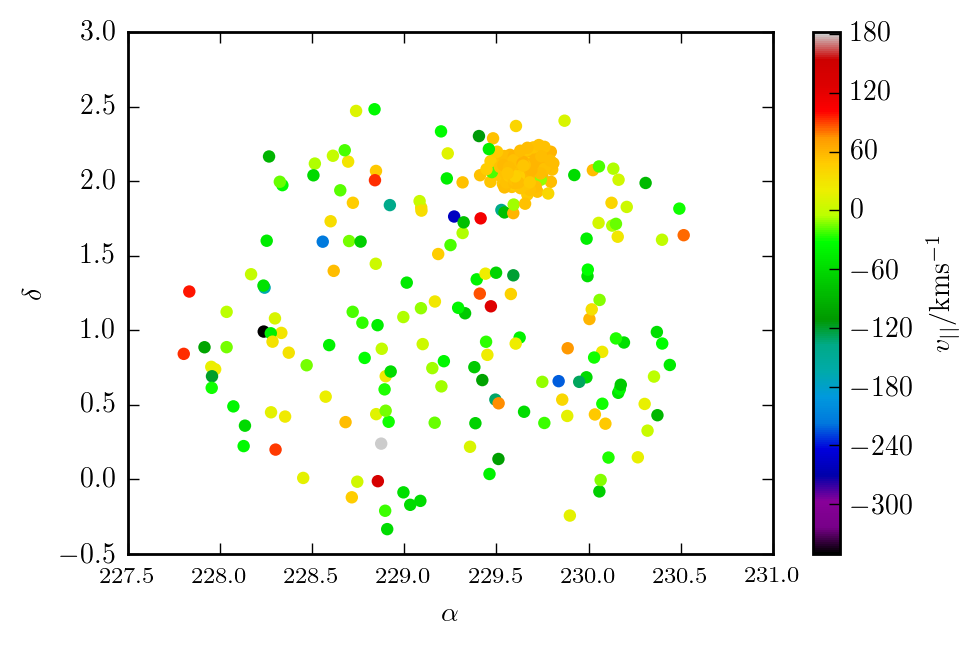

In [322]:
plt.scatter(data['RA'],data['DEC'],c='0.3',alpha=0.1,edgecolors='none',s=1)
plt.scatter(pal5['RA'],pal5['DEC'],c='r',edgecolors='none',s=1)
plt.xlabel("$\\alpha$")
plt.ylabel("$\\delta$")
plt.figure()
plt.scatter(pal5['RA'],pal5['DEC'],c=pal5['VHELIO_AVG'],cmap="spectral",edgecolors='none')
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.xlabel("$\\alpha$")
plt.ylabel("$\\delta$")
plt.savefig(plotstr+"pal5m5_ra_dec_vhelio.pdf")

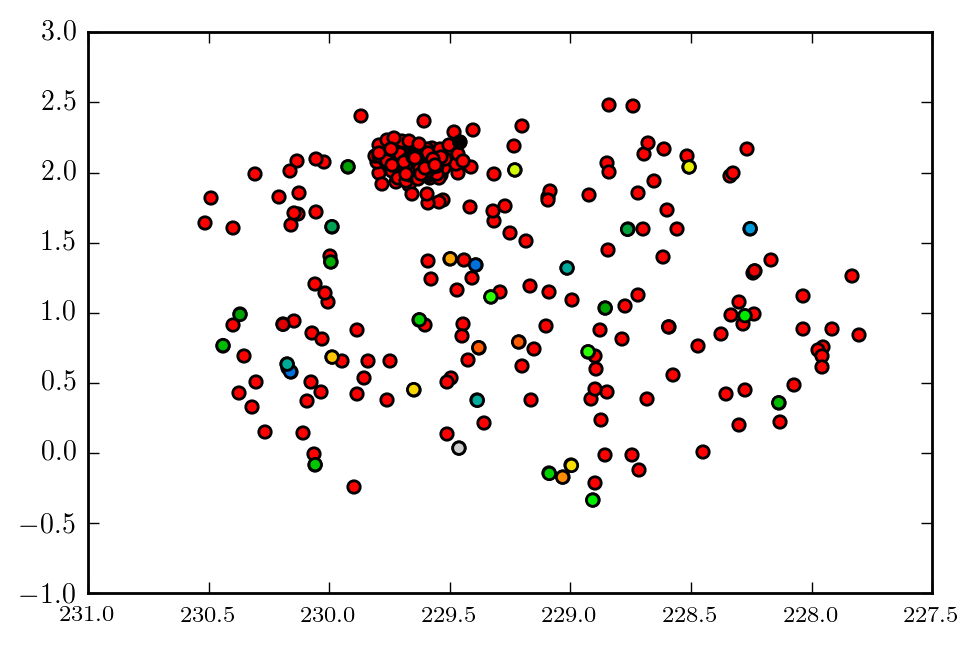

In [309]:
idx = (np.abs(pal5['VHELIO_AVG']+57.4)<20.)
plt.scatter(pal5['RA'],pal5['DEC'],c='r')
plt.scatter(pal5['RA'][idx],pal5['DEC'][idx],c=pal5['PMRA'][idx],cmap="spectral")
plt.gca().invert_xaxis()

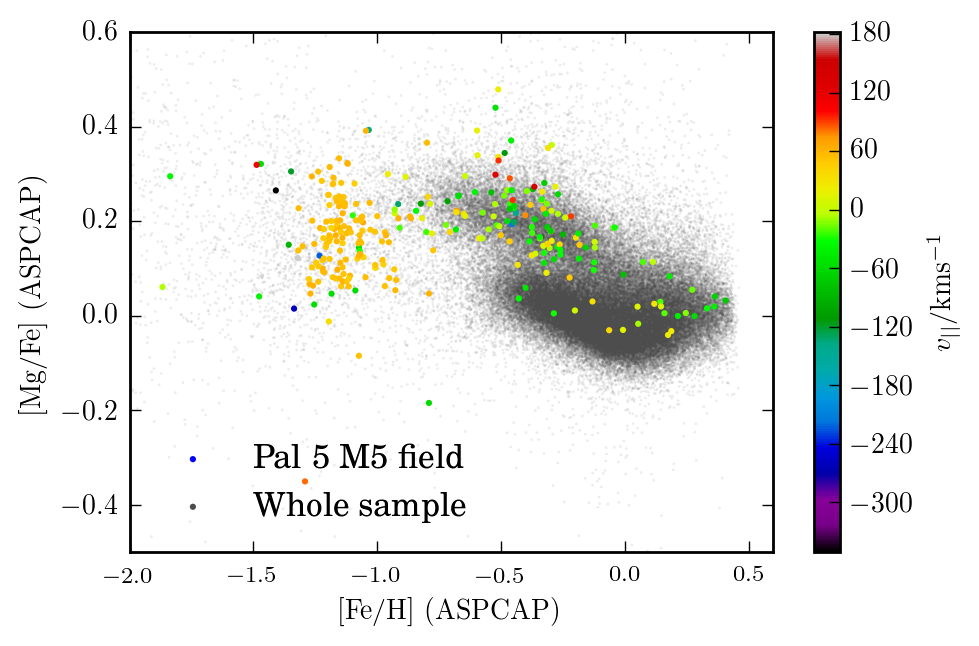

In [323]:
#make some plots of the data but using ASPCAP
plt.scatter(data['FE_H_ASPCAP'],data['MG_H_ASPCAP']-data['FE_H_ASPCAP'],c='0.3',alpha=0.1,s=1,edgecolors='none')
plt.scatter(pal5['FE_H_ASPCAP'],pal5['MG_H_ASPCAP']-pal5['FE_H_ASPCAP'],c=pal5['VHELIO_AVG'],cmap="spectral",
            s=5,edgecolors='none',label="Pal 5 M5 field")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.scatter(1.,-1.,c='0.3',edgecolors='none',s=5,label="Whole sample")
plt.legend(loc='lower left',frameon=False,scatterpoints=1)
plt.xlim((-2.,0.6))
plt.ylim((-0.5,0.6))
plt.xlabel("$\\mathrm{[Fe/H]\,\,(ASPCAP)}$")
plt.ylabel("$\\mathrm{[Mg/Fe]\,\,(ASPCAP)}$")
plt.savefig(plotstr+"ASPCAP_alphafe_feh.pdf")

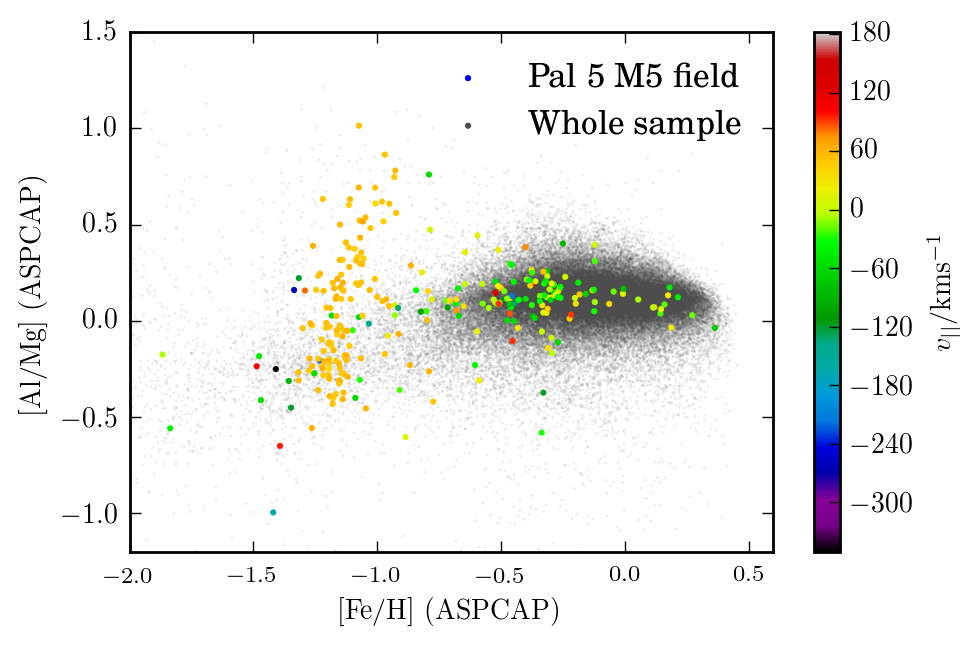

In [324]:
plt.scatter(data['FE_H_ASPCAP'],data['AL_H_ASPCAP']-data['MG_H_ASPCAP'],c='0.3',alpha=0.1,s=1,edgecolors='none')
plt.scatter(pal5['FE_H_ASPCAP'],pal5['AL_H_ASPCAP']-pal5['MG_H_ASPCAP'],c=pal5['VHELIO_AVG'],cmap="spectral",
            s=5,edgecolors='none',label="Pal 5 M5 field")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.scatter(1.,-1.,c='0.3',edgecolors='none',s=5,label="Whole sample")
plt.legend(loc='upper right',frameon=False,scatterpoints=1)
plt.xlim((-2.,0.6))
plt.ylim((-1.2,1.5))
plt.xlabel("$\\mathrm{[Fe/H]\,\,(ASPCAP)}$")
plt.ylabel("$\\mathrm{[Al/Mg]\,\,(ASPCAP)}$")
plt.savefig(plotstr+"ASPCAP_almg_feh.pdf")

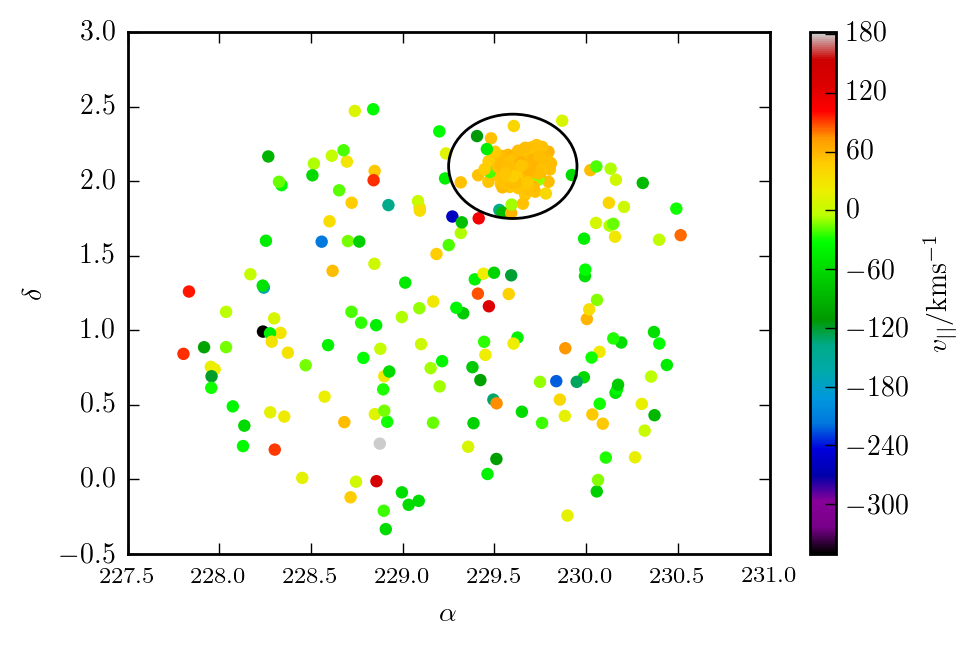

In [336]:
#remove as many M5 stars as possible
from matplotlib.patches import Ellipse
cut = Ellipse(xy=[229.6,2.1], width=.7, height=.7, angle=0.,fill=False)
plt.gca().add_artist(cut)
cut.set_clip_box(plt.gca().bbox)
plt.scatter(pal5['RA'],pal5['DEC'],c=pal5['VHELIO_AVG'],cmap="spectral",edgecolors='none')
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.xlabel("$\\alpha$")
plt.ylabel("$\\delta$")

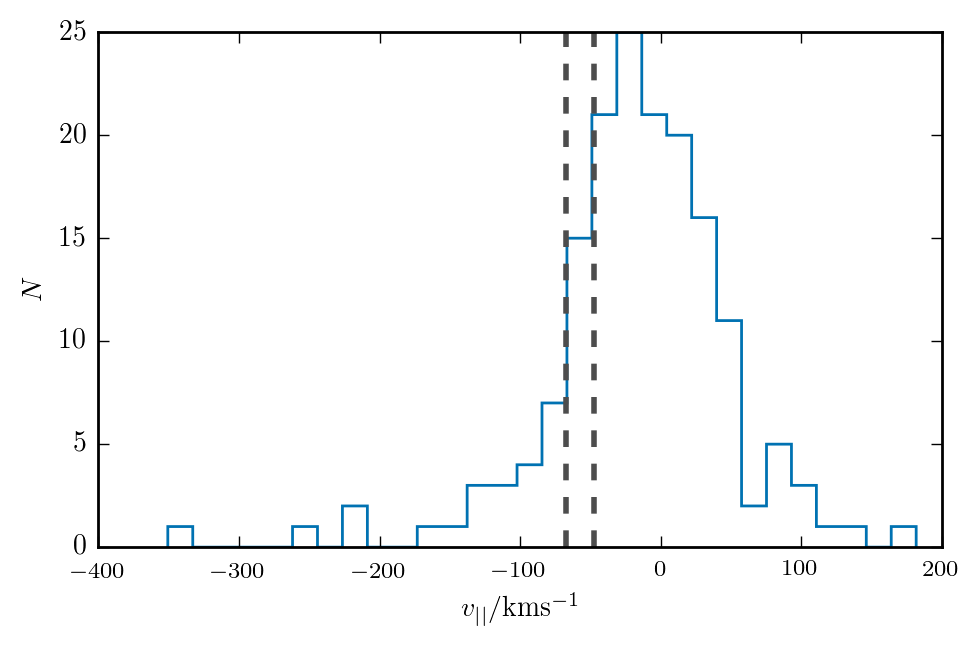

In [348]:
idx = (np.sqrt((pal5['RA']-229.6)**2.+(pal5['DEC']-2.1)**2.)>0.35)
pal5cut = pal5[idx]
pal5stars = pal5cut[np.abs(pal5cut['VHELIO_AVG']+57.4)<10.]
#look at RV distribution of stars after the cut, and put lines pm 10 km/s of the Pal5 RV
plt.hist(pal5cut['VHELIO_AVG'],30,histtype="step")
plt.axvline(-57.4+10.,c='0.3',ls='--')
plt.axvline(-57.4-10.,c='0.3',ls='--')
plt.xlabel("$v_{||}/\\mathrm{kms^{-1}}$")
plt.ylabel("$N$")

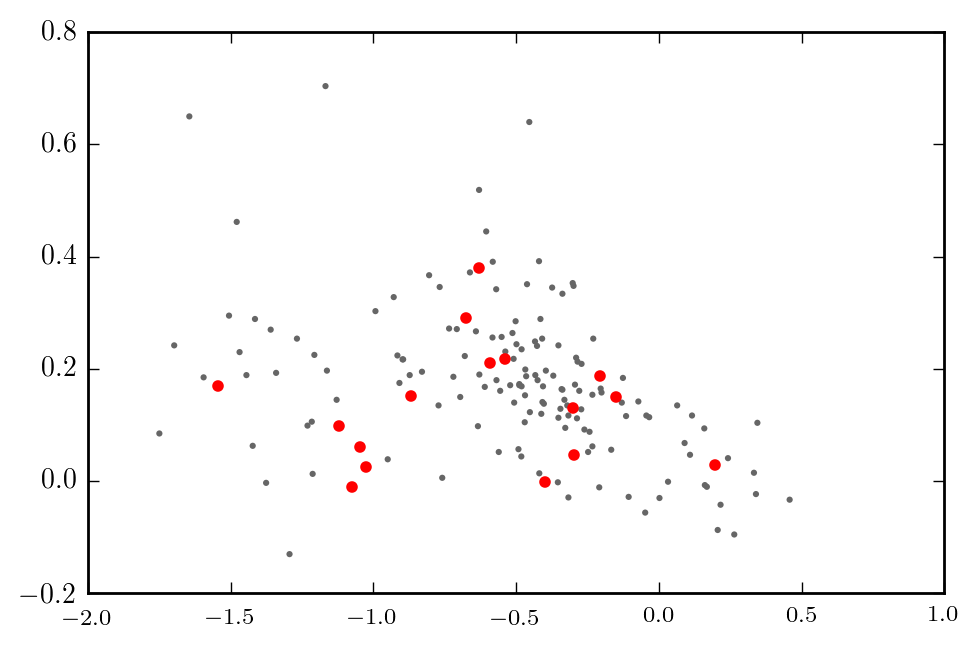

In [353]:
plt.scatter(pal5cut['FE_H'],pal5cut['MG_H']-pal5cut['FE_H'],color='0.4',
            s=5,edgecolors='none',label="Everything (minus M5)")
plt.scatter(pal5stars['FE_H'],pal5stars['MG_H']-pal5stars['FE_H'],color='r',
            s=10,label="Everything (minus M5)")

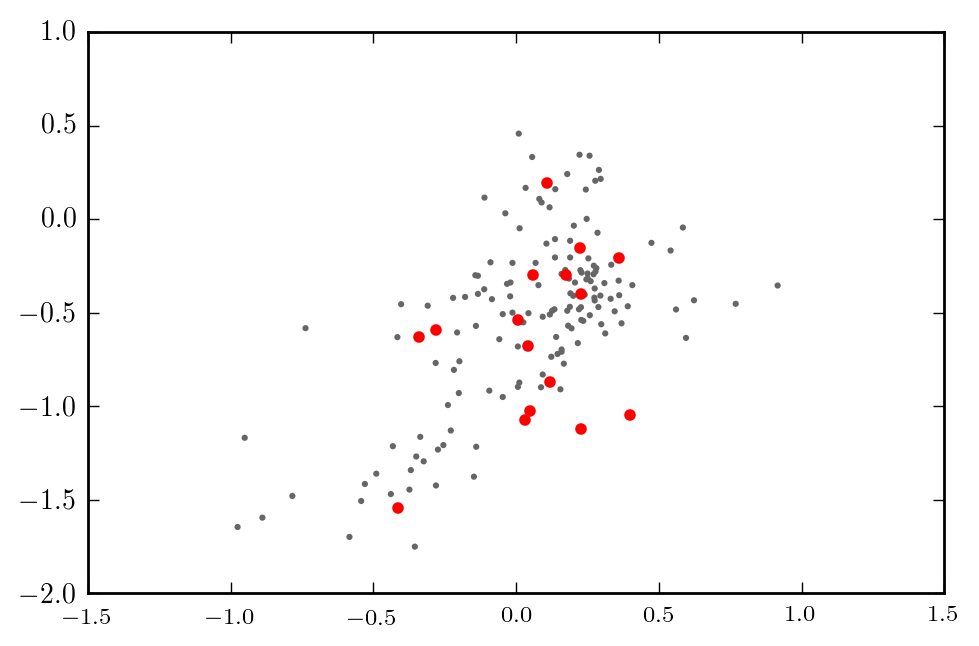

In [355]:
plt.scatter(pal5cut['AL_H']-pal5cut['MG_H'],pal5cut['FE_H'],color='0.4',
            s=5,edgecolors='none',label="Everything (minus M5)")
plt.scatter(pal5stars['AL_H']-pal5stars['MG_H'],pal5stars['FE_H'],color='r',
            s=10,label="Everything (minus M5)")

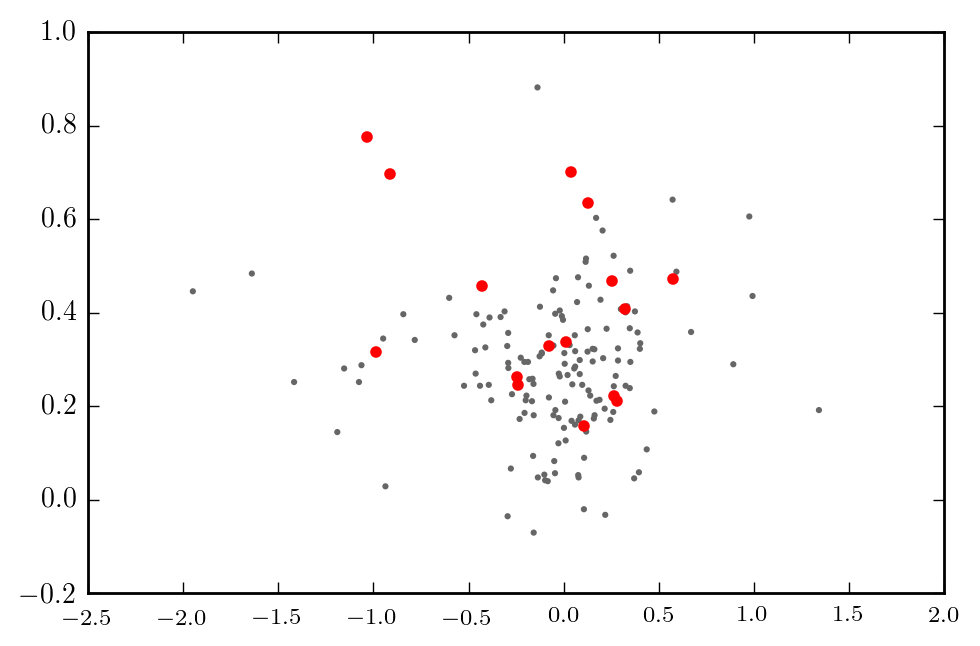

In [357]:
plt.scatter(pal5cut['NA_H']-pal5cut['FE_H'],pal5cut['O_H']-pal5cut['FE_H'],color='0.4',
            s=5,edgecolors='none',label="Everything (minus M5)")
plt.scatter(pal5stars['NA_H']-pal5stars['FE_H'],pal5stars['O_H']-pal5stars['FE_H'],color='r',
            s=10,label="Everything (minus M5)")

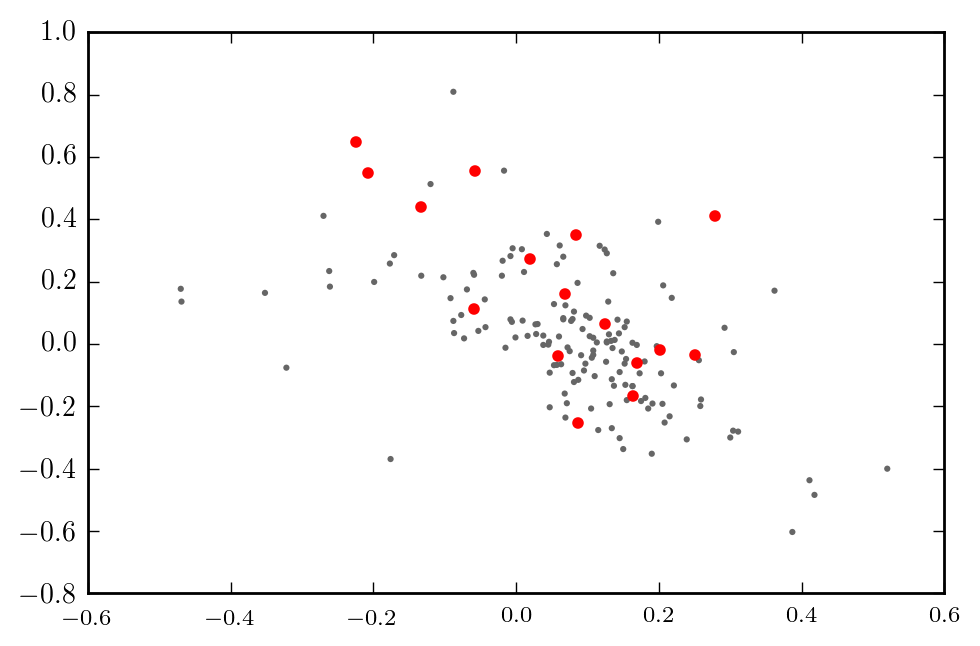

In [358]:
plt.scatter(pal5cut['C_H']-pal5cut['FE_H'],pal5cut['N_H']-pal5cut['FE_H'],color='0.4',
            s=5,edgecolors='none',label="Everything (minus M5)")
plt.scatter(pal5stars['C_H']-pal5stars['FE_H'],pal5stars['N_H']-pal5stars['FE_H'],color='r',
            s=10,label="Everything (minus M5)")

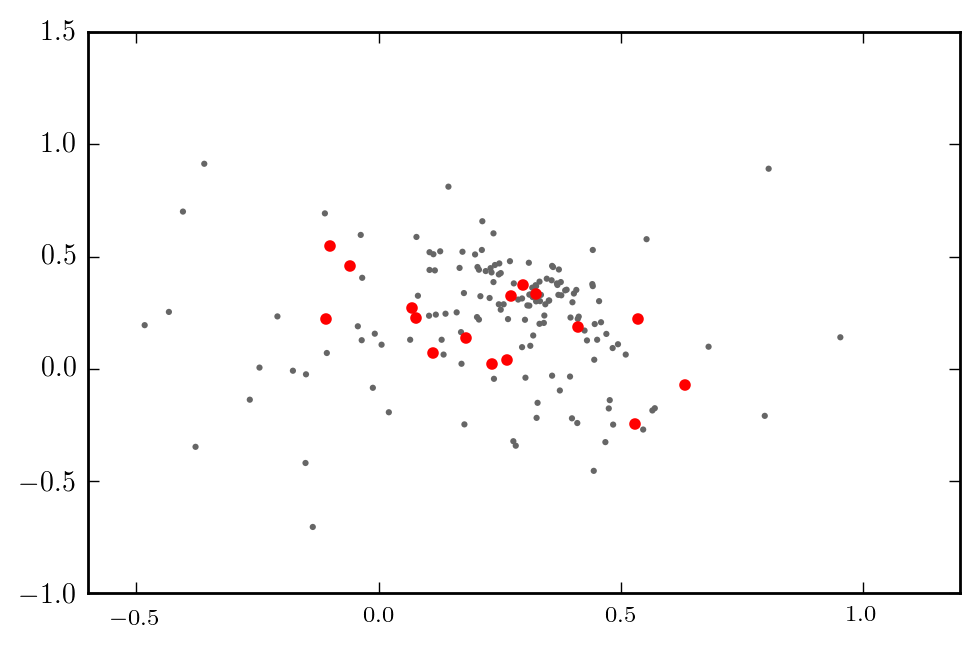

In [359]:
plt.scatter(pal5cut['S_H']-pal5cut['FE_H'],pal5cut['AL_H']-pal5cut['FE_H'],color='0.4',
            s=5,edgecolors='none',label="Everything (minus M5)")
plt.scatter(pal5stars['S_H']-pal5stars['FE_H'],pal5stars['AL_H']-pal5stars['FE_H'],color='r',
            s=10,label="Everything (minus M5)")

In [369]:
from sklearn.cluster import KMeans
X = np.vstack((pal5cut['AL_H'],pal5cut['CA_H'],pal5cut['C_H'],pal5cut['FE_H'],
              pal5cut['K_H'],pal5cut['MG_H'],pal5cut['MN_H'],pal5cut['NA_H'],
              pal5cut['NI_H'],pal5cut['N_H'],pal5cut['O_H'],pal5cut['SI_H'],
              pal5cut['S_H'],pal5cut['TI_H'],pal5cut['V_H'])).T
Y = np.vstack((pal5cut['LOGG']/np.mean(pal5cut['LOGG']),pal5cut['TEFF']/np.mean(pal5cut['TEFF']))).T
km = KMeans(n_clusters=2)
ypred=km.fit_predict(Y)

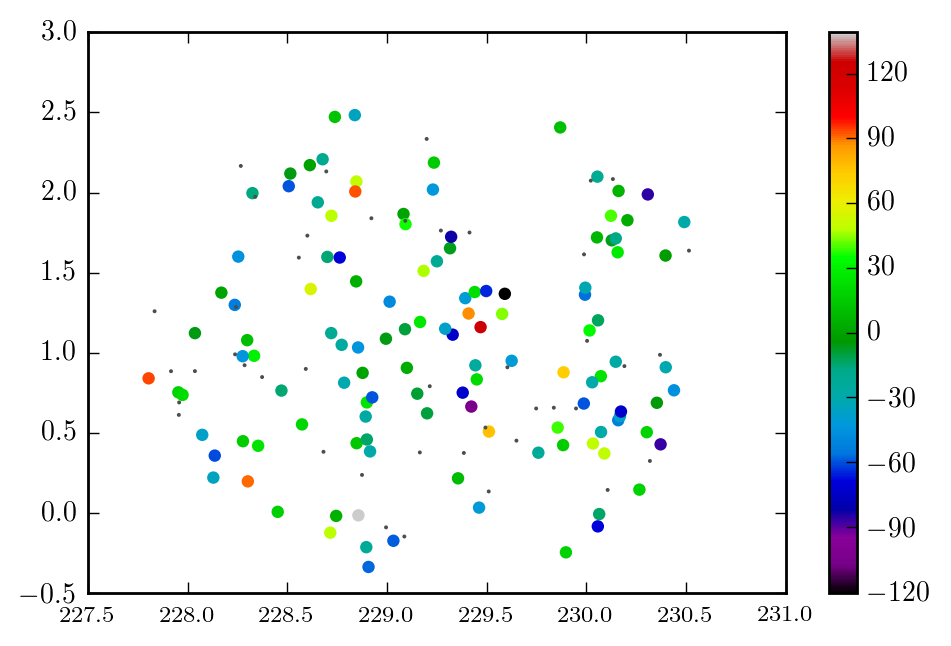

In [370]:
plt.scatter(pal5cut['RA'][ypred==0],pal5cut['DEC'][ypred==0],c=pal5cut['VHELIO_AVG'][ypred==0],edgecolors='none',cmap="spectral")
plt.colorbar()
plt.scatter(pal5cut['RA'][ypred==1],pal5cut['DEC'][ypred==1],c='0.3',s=2,edgecolors='none')
